In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
import pandas as pd
from imutils import paths
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
!unzip '/content/gdrive/MyDrive/New Gray Train.zip'
!unzip '/content/gdrive/MyDrive/New Gray Test.zip'

Archive:  /content/gdrive/MyDrive/New Gray Train.zip
   creating: New Gray Train/Normal/
  inflating: New Gray Train/Normal/anastase-maragos-iUzgePOoGko-unsplash.jpg  
  inflating: New Gray Train/Normal/download (1).jpg  
  inflating: New Gray Train/Normal/download (10).jpg  
  inflating: New Gray Train/Normal/download (11).jpg  
  inflating: New Gray Train/Normal/download (12).jpg  
  inflating: New Gray Train/Normal/download (15).jpg  
  inflating: New Gray Train/Normal/download (16).jpg  
  inflating: New Gray Train/Normal/download (17).jpg  
  inflating: New Gray Train/Normal/download (2).jpg  
  inflating: New Gray Train/Normal/download (4).jpg  
  inflating: New Gray Train/Normal/download (5).jpg  
  inflating: New Gray Train/Normal/download (6).jpg  
  inflating: New Gray Train/Normal/download (7).jpg  
  inflating: New Gray Train/Normal/download (8).jpg  
  inflating: New Gray Train/Normal/download (9).jpg  
  inflating: New Gray Train/Normal/Free_Photo_700x860_1401750460.jpg  

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/New Gray Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/New Gray Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1665 images belonging to 4 classes.
Found 99 images belonging to 4 classes.


In [47]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [48]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
53/53 [==============================] - 61s 1s/step - loss: 1.1860 - accuracy: 0.5598 - val_loss: 0.9779 - val_accuracy: 0.6162
Epoch 2/10
53/53 [==============================] - 61s 1s/step - loss: 0.7434 - accuracy: 0.7363 - val_loss: 0.9045 - val_accuracy: 0.6364
Epoch 3/10
53/53 [==============================] - 60s 1s/step - loss: 0.5197 - accuracy: 0.8018 - val_loss: 1.2089 - val_accuracy: 0.5556
Epoch 4/10
53/53 [==============================] - 60s 1s/step - loss: 0.4552 - accuracy: 0.8348 - val_loss: 0.8775 - val_accuracy: 0.6465
Epoch 5/10
53/53 [==============================] - 60s 1s/step - loss: 0.4432 - accuracy: 0.8312 - val_loss: 0.9197 - val_accuracy: 0.6061
Epoch 6/10
53/53 [==============================] - 61s 1s/step - loss: 0.3417 - accuracy: 0.8805 - val_loss: 0.9764 - val_accuracy: 0.6364
Epoch 7/10
53/53 [==============================] - 59s 1s/step - loss: 0.2999 - accuracy: 0.8949 - val_loss: 1.2434 - val_accuracy: 0.6869
Epoch 8/10
53/53 [==

In [49]:
model.save('vgg16model2.h5')

In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/930e68734523260d35cca7febc0b301f-modified.jpg"
'''
img = cv2.imread(os.path.join(image_path,image))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
'''
img = image.load_img( image_path, target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [110]:
predict = model.predict([img])

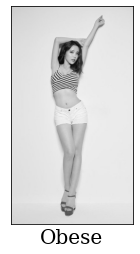

In [111]:
img1 = cv2.imread("/content/930e68734523260d35cca7febc0b301f-modified.jpg")
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
    plt.xlabel("Underweight" , fontdict = font)

if predict[0][1] == 1 :
    plt.xlabel("Normal" , fontdict = font)
    
if predict[0][2] == 1 :
    plt.xlabel("Overweight" , fontdict = font)

if predict[0][3] == 1 :
    plt.xlabel("Obese" , fontdict = font)


plt.show()

In [112]:
predict

array([[0.0000000e+00, 0.0000000e+00, 3.5552858e-17, 1.0000000e+00]],
      dtype=float32)